In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

the data set consists of US weather data; temperatures and rainfall

In [2]:
data_full=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv')

In [3]:
data_full.head()
data_full.dtypes

date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
dtype: object

we are not interested in all the data, so lets cut it down

In [4]:
data=data_full[['date','actual_mean_temp','actual_min_temp',
                'actual_max_temp','record_min_temp',
                'record_max_temp','actual_precipitation',
                'record_precipitation']]
data.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,record_min_temp,record_max_temp,actual_precipitation,record_precipitation
0,2014-7-1,81,70,91,56,104,0.00,5.91
1,2014-7-2,85,74,95,56,101,0.00,1.53
2,2014-7-3,82,71,93,56,99,0.14,2.50
3,2014-7-4,75,64,86,55,99,0.00,2.63
4,2014-7-5,72,60,84,57,100,0.00,1.65


In [5]:
# the date needs to be changed into the date format, in order to use the Grouper function later
data['date']=pd.to_datetime(data['date'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


we can then split our data to look at reconds on a weekly or monthly basis. 
we group by date, and then provide the min max or mean of column

In [6]:
monthly_data=data.groupby(pd.Grouper(key='date', freq='M')).agg({
    'actual_mean_temp': 'mean',
    'actual_min_temp': 'min',
    'actual_max_temp': 'max',
    'record_min_temp' :'min',
    'record_max_temp': 'max',
    'record_precipitation': 'max',
    'actual_precipitation': 'mean'
})
monthly_data.head()

,actual_mean_temp,actual_min_temp,actual_max_temp,record_min_temp,record_max_temp,record_precipitation,actual_precipitation
date,,,,,,,
2014-07-31,77.741935,60,96,53,104,6.88,0.141290
2014-08-31,76.580645,57,95,50,104,5.36,0.120645
2014-09-30,72.533333,53,94,38,104,4.84,0.145000
2014-10-31,63.225806,38,87,24,98,4.76,0.043548
2014-11-30,47.533333,14,77,11,85,3.26,0.126333


we can then plot our data using matplotlib

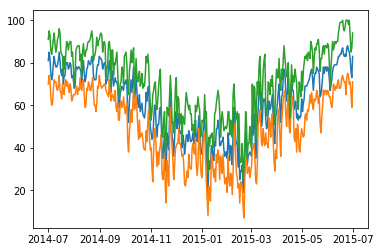

In [7]:
%matplotlib inline
plt.plot(data['date'], data[['actual_mean_temp','actual_min_temp','actual_max_temp']])

this plot doesnt look great, so we can add a label, make the lines thinner, and specify certain colours for the lines

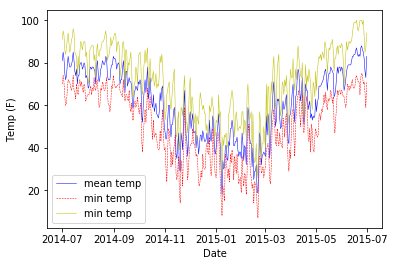

In [8]:
fig, ax = plt.subplots()
ax.plot(data['date'], data['actual_mean_temp'], '-b', label='mean temp', linewidth=0.5)
ax.plot(data['date'], data['actual_min_temp'], '--r', label='min temp', linewidth=.5)
ax.plot(data['date'], data['actual_max_temp'], 'y', label='min temp', linewidth=.5)
plt.xlabel('Date')
plt.ylabel('Temp (F)')
#plt.ylim(0, 100)
leg = ax.legend()

# Finding outliers

## Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis)

1. boxplots
2. z score
3. standard deviation 
4. Quartiles and IQR

## boxplot
a box plot will show us the dispersion of the data. The two whiskers show the min and max values of our data, anything outside of this will be an outlier. 
The left and right lines of the box show 25th and 75th percentile, and the middle line in the box representing the median.
anything inside the box is within the interquartile range.

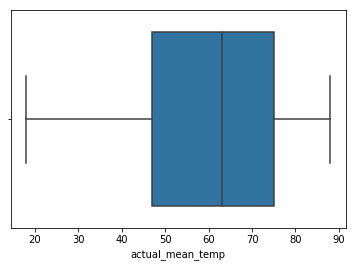

In [9]:
sns.boxplot(x=data['actual_mean_temp'])


we can plot all 5 temperature box plots on one graph. According to the boxplots, there are no outliers

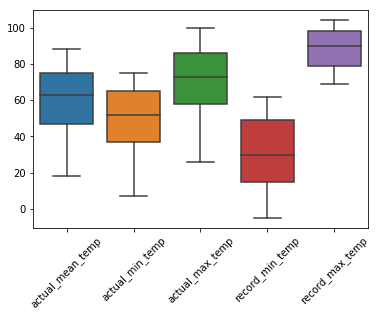

In [10]:
drop_date=data.drop(['date'], axis=1)
boxplot=sns.boxplot(data=drop_date[['actual_mean_temp','actual_min_temp','actual_max_temp','record_min_temp','record_max_temp']])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

although it seems we have a few outliers in our precipitation dataset...


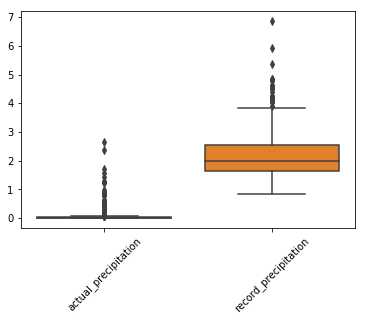

In [11]:
boxplot_rain=sns.boxplot(data=drop_date[['actual_precipitation','record_precipitation']])
boxplot_rain.set_xticklabels(boxplot_rain.get_xticklabels(), rotation=45)

## zscore



while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.

In [12]:
z= stats.zscore(data.drop(['date'], axis=1))

in most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
the first array show the row in which we find an outlier, with the corresponding column number displayed in the second array. we can see that all our outliers are in column 5 and 6- the precipitation column.

In [13]:
threshold = 3
np.where(z > 3)

(array([  0,  20,  22,  30,  31,  56,  74, 145, 288, 292, 321, 360], dtype=int64),
 array([6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5], dtype=int64))

In [14]:
#alternative method
zdataframe=data.drop(['date'], axis=1).apply(stats.zscore)
idx= np.where(zdataframe > 3)
# this will give us the rows where z is greater than 3. 
data.loc[idx[0]]

,date,actual_mean_temp,actual_min_temp,actual_max_temp,record_min_temp,record_max_temp,actual_precipitation,record_precipitation
0,2014-07-01,81,70,91,56,104,0.00,5.91
20,2014-07-21,74,70,77,57,103,1.30,3.83
22,2014-07-23,80,69,90,56,101,0.00,6.88
30,2014-07-31,72,65,78,56,100,1.45,1.45
31,2014-08-01,68,65,70,58,98,2.39,2.39
56,2014-08-26,72,60,84,55,100,0.00,5.36
74,2014-09-13,76,66,86,49,94,1.56,4.12
145,2014-11-23,54,42,65,18,78,1.72,1.72
288,2015-04-15,58,50,65,28,89,1.26,1.73
292,2015-04-19,67,64,69,30,89,2.65,2.65


we can then remove these outliers from our dataset

In [15]:
removed_outliers = pd.concat([data, data.loc[idx[0]]]).drop_duplicates(keep=False)
removed_outliers.head(20)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,record_min_temp,record_max_temp,actual_precipitation,record_precipitation
1,2014-07-02,85,74,95,56,101,0.00,1.53
2,2014-07-03,82,71,93,56,99,0.14,2.50
3,2014-07-04,75,64,86,55,99,0.00,2.63
4,2014-07-05,72,60,84,57,100,0.00,1.65
5,2014-07-06,74,61,87,57,99,0.00,1.95
6,2014-07-07,79,67,91,55,100,0.00,2.37
7,2014-07-08,83,72,94,58,101,0.00,1.87
8,2014-07-09,80,71,89,57,101,0.15,3.71
9,2014-07-10,78,71,85,53,101,0.00,2.45
10,2014-07-11,78,68,87,55,100,0.00,3.10


## Standard Dev

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.
Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.
    1 Standard Deviation from the Mean: 68%
    2 Standard Deviations from the Mean: 95%
    3 Standard Deviations from the Mean: 99.7%

In [16]:
# calculate summary statistics
data_mean_precip, data_std_precip = np.mean(data['record_precipitation']), np.std(data['record_precipitation'])
print('mean: ',data_mean_precip, 'std: ', data_std_precip  )

mean:  2.208904109589042 std:  0.8781720766936744


In [17]:
# identify outliers
cut_off = data_std_precip * 3
print('cutoff for outliers: ', cut_off)

cutoff for outliers:  2.634516230081023


In [18]:
lower, upper = data_mean_precip - cut_off, data_mean_precip + cut_off
print('lower limit for outlier: ', lower, 'upper limit for outlier: ', upper)
# identify outliers as those examples that fall outside of the defined lower and upper limits.

lower limit for outlier:  -0.4256121204919814 upper limit for outlier:  4.843420339670065


In [19]:
outliers = [x for x in data['record_precipitation'] if x < lower or x > upper]
print('outliers: ', outliers)

outliers:  [5.9100000000000001, 6.8799999999999999, 5.3600000000000003, 4.8499999999999996]


In [20]:
print('number of outliers: ', len(outliers))

number of outliers:  4


# Percentiles and IQR

the cutoff for outliers can be calculated as 1.5 times the IQR. 

In [21]:
q25, q75 = np.percentile(data['actual_precipitation'], 25), np.percentile(data['actual_precipitation'], 75)
iqr = q75 - q25

print('25th Percentile: %.3f, \n75th Percentile: %.3f, \nIQR: %.3f' % (q25, q75, iqr))

25th Percentile: 0.000, 
75th Percentile: 0.030, 
IQR: 0.030


In [22]:
#calculate the cutoff for outliers as 1.5 times the IQR
cutoff= 1.5 * iqr
lowerlimit, upperlimit= q25-cutoff, q75+cutoff

In [23]:
outliers= [x for x in data['actual_precipitation'] if x> upperlimit or x<lowerlimit]
print('number of outliers: ', len(outliers))

number of outliers:  76


# automatic detection of outliers

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
boston_data = pd.DataFrame(load_boston().data)
boston_data.columns = load_boston().feature_names
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
#target data needs to be added to our dataset
boston_data['PRICE']=load_boston().target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


we can create a simple linear regession model, of which we can use when we perform the automatic outlier detection methods

In [26]:
# the x data will be all columns in our dataset minus the last column- the price, which will be our price column.
x, y = boston_data.iloc[:, :-1], boston_data.iloc[:, -1]

In [27]:
# split our data into x and y training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)
print(x_train.shape)
print(x_train.head())
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.head())

(404, 13)
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
33    1.15172   0.0   8.14   0.0  0.538  5.701   95.0  3.7872   4.0  307.0   
283   0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
418  73.53410   0.0  18.10   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
502   0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875   1.0  273.0   
402   9.59571   0.0  18.10   0.0  0.693  6.404  100.0  1.6390  24.0  666.0   

     PTRATIO       B  LSTAT  
33      21.0  358.77  18.35  
283     13.6  395.52   3.16  
418     20.2   16.45  20.62  
502     21.0  396.90   9.08  
402     20.2  376.11  20.31  
(102, 13)
(404,)
(102,)
226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: PRICE, dtype: float64


In [28]:
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)
r2=sklearn.metrics.r2_score(y_test, y_pred)
print('R2', r2)

20.9028436804
MAE: 3.215
R2 0.733020681871


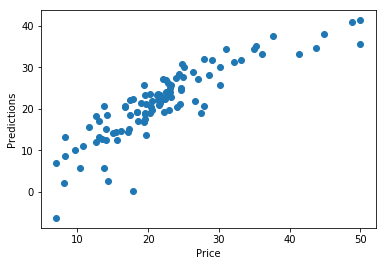

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price')
plt.ylabel('Predictions')

now that we have a baseline model, we can look at removing outliers and see how the model performs

# isolation forest
isolation forest is a tree based outlier detection algorthim.
it returns -1 for outliers and 1 for inliers

In [30]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
iso.fit(x_train)
outlier= iso.predict(x_train)
x_train['outlier']=iso.predict(x_train)



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


here we can print a -1 or 1 next to each row of data to see which is an outlier or not

In [31]:
print(x_train.head())

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
33    1.15172   0.0   8.14   0.0  0.538  5.701   95.0  3.7872   4.0  307.0   
283   0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
418  73.53410   0.0  18.10   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
502   0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875   1.0  273.0   
402   9.59571   0.0  18.10   0.0  0.693  6.404  100.0  1.6390  24.0  666.0   

     PTRATIO       B  LSTAT  outlier  
33      21.0  358.77  18.35        1  
283     13.6  395.52   3.16       -1  
418     20.2   16.45  20.62       -1  
502     21.0  396.90   9.08        1  
402     20.2  376.11  20.31        1  


we can then remove these outliers from our dataset

In [32]:
anomaly=x_train.loc[x_train['outlier']==-1]
print(anomaly.head())


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
283   0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
418  73.53410   0.0  18.10   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
197   0.04666  80.0   1.52   0.0  0.404  7.107   36.6  7.3090   2.0  329.0   
145   2.37934   0.0  19.58   0.0  0.871  6.130  100.0  1.4191   5.0  403.0   
162   1.83377   0.0  19.58   1.0  0.605  7.802   98.2  2.0407   5.0  403.0   

     PTRATIO       B  LSTAT  outlier  
283     13.6  395.52   3.16       -1  
418     20.2   16.45  20.62       -1  
197     12.6  354.31   8.61       -1  
145     14.7  172.91  27.80       -1  
162     14.7  389.61   1.92       -1  


create an x training dataset where outliers are removed

In [33]:

clean_data_x=x_train.loc[x_train['outlier']==1]
clean_data_x=clean_data_x.drop('outlier', axis=1)
print(clean_data_x.head())

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
33   1.15172   0.0   8.14   0.0  0.538  5.701   95.0  3.7872   4.0  307.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875   1.0  273.0   
402  9.59571   0.0  18.10   0.0  0.693  6.404  100.0  1.6390  24.0  666.0   
368  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
201  0.03445  82.5   2.03   0.0  0.415  6.162   38.4  6.2700   2.0  348.0   

     PTRATIO       B  LSTAT  
33      21.0  358.77  18.35  
502     21.0  396.90   9.08  
402     20.2  376.11  20.31  
368     20.2  375.52   3.26  
201     14.7  393.77   7.43  


we can do the same with the target variables, removing the outliers. 

In [34]:
clean_data_y=y_train.loc[x_train['outlier']==1]
print(clean_data_y.head())

33     13.1
502    20.6
402    12.1
368    50.0
201    24.1
Name: PRICE, dtype: float64


we can then rerun the model and see how it performs without the outliers

In [35]:
lr=LinearRegression()
lr.fit(clean_data_x, clean_data_y)
y_pred = lr.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)
r2=sklearn.metrics.r2_score(y_test, y_pred)
print('R2', r2)

21.5766626619
MAE: 3.270
R2 0.724414401549


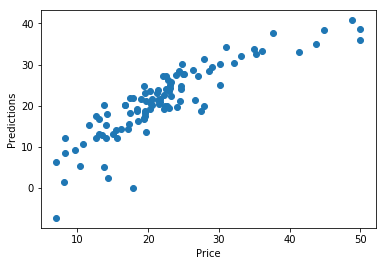

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price')
plt.ylabel('Predictions')

## Summary of descriptive stats on a dataset using scipy and pandas

In [37]:
import scipy
descriptive_stats = scipy.stats.describe(boston_data['PRICE'], bias=False)
print('number of observations in dataset: ', descriptive_stats.nobs,
     '\nminimum and maximum values in dataset', descriptive_stats.minmax[0],descriptive_stats.minmax[1],
     '\nmean',descriptive_stats.mean,
     '\nvariance', descriptive_stats.variance,
     '\nskewness', descriptive_stats.skewness,
     '\nkurtosis', descriptive_stats.kurtosis)

number of observations in dataset:  506 
minimum and maximum values in dataset 5.0 50.0 
mean 22.5328063241 
variance 84.5867235941 
skewness 1.1080984082549072 
kurtosis 1.4951969441658175


In [38]:
pandas_stats = boston_data['PRICE'].describe()
print(pandas_stats)

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64
